# Intro to Pandas

In [1]:
import numpy as np
import pandas as pd
import math
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# get Pansda's vesrion #
print 'Pandas version ' + pd.__version__

Pandas version 0.19.0+git14-ga40e185


In [6]:
# record-setting temperatures in Ohio cities on Jan 7 2014   
city = ['Akron-Canton', 'Mansfield', 'Cleveland', 'Toledo', 'Youngstown', 'Columbus', 'ew Philadelphia', 'Zanesville']
temperature=[-11, -12, -11, -14, -12, -7, -9, -8]

In [7]:
# create a zipped oabject (list of tuples)
record_temps = zip(city,temperature)
print record_temps

[('Akron-Canton', -11), ('Mansfield', -12), ('Cleveland', -11), ('Toledo', -14), ('Youngstown', -12), ('Columbus', -7), ('ew Philadelphia', -9), ('Zanesville', -8)]


In [8]:
# create a Panda dataframe
df = DataFrame(data = record_temps, columns=['City', 'Temperature'])
df

,City,Temperature
0,Akron-Canton,-11
1,Mansfield,-12
2,Cleveland,-11
3,Toledo,-14
4,Youngstown,-12
5,Columbus,-7
6,ew Philadelphia,-9
7,Zanesville,-8


In [9]:
# save the frames out to csv files 
df.to_csv('tempJan72014-1.csv',index=False,header=False)
df.to_csv('tempJan72014-2.csv',index=True,header=False)
df.to_csv('tempJan72014-3.csv',index=False,header=True)
df.to_csv('tempJan72014-4.csv',index=True,header=True)

In [7]:
# read the saved files and see what the different "writes" gave us
df1 = pd.read_csv('tempJan72014-1.csv')
df2 = pd.read_csv('tempJan72014-2.csv')
df3 = pd.read_csv('tempJan72014-3.csv')
df4 = pd.read_csv('tempJan72014-4.csv')

In [8]:
df1

,Akron-Canton,-11
0,Mansfield,-12
1,Cleveland,-11
2,Toledo,-14
3,Youngstown,-12
4,Columbus,-7
5,ew Philadelphia,-9
6,Zanesville,-8


In [9]:
df2

,0,Akron-Canton,-11
0,1,Mansfield,-12
1,2,Cleveland,-11
2,3,Toledo,-14
3,4,Youngstown,-12
4,5,Columbus,-7
5,6,ew Philadelphia,-9
6,7,Zanesville,-8


In [10]:
df3 # this seems the best way to write out a csv file

,City,Temperature
0,Akron-Canton,-11
1,Mansfield,-12
2,Cleveland,-11
3,Toledo,-14
4,Youngstown,-12
5,Columbus,-7
6,ew Philadelphia,-9
7,Zanesville,-8


In [11]:
df4

,Unnamed: 0,City,Temperature
0,0,Akron-Canton,-11
1,1,Mansfield,-12
2,2,Cleveland,-11
3,3,Toledo,-14
4,4,Youngstown,-12
5,5,Columbus,-7
6,6,ew Philadelphia,-9
7,7,Zanesville,-8


In [12]:
# read without the header
df1 = pd.read_csv('tempJan72014-1.csv', header=None)
df1

,0,1
0,Akron-Canton,-11
1,Mansfield,-12
2,Cleveland,-11
3,Toledo,-14
4,Youngstown,-12
5,Columbus,-7
6,ew Philadelphia,-9
7,Zanesville,-8


In [13]:
# read and assign values to the header
df1 = pd.read_csv('tempJan72014-1.csv', names=['City', 'Temperature'])
df1

,City,Temperature
0,Akron-Canton,-11
1,Mansfield,-12
2,Cleveland,-11
3,Toledo,-14
4,Youngstown,-12
5,Columbus,-7
6,ew Philadelphia,-9
7,Zanesville,-8


In [14]:
# compute the min temperature
df['Temperature'].min()

-14

In [10]:
# anothe way to define  a DF
df5 = pd.DataFrame({'City': ['Akron-Canton', 'Mansfield', 'Cleveland', 'Toledo', 'Youngstown', 'Columbus', 'ew Philadelphia', 'Zanesville'],
                   'Temperature': [-11, -12, -11, -14, -12, -7, -9, -8]})
df5

,City,Temperature
0,Akron-Canton,-11
1,Mansfield,-12
2,Cleveland,-11
3,Toledo,-14
4,Youngstown,-12
5,Columbus,-7
6,ew Philadelphia,-9
7,Zanesville,-8


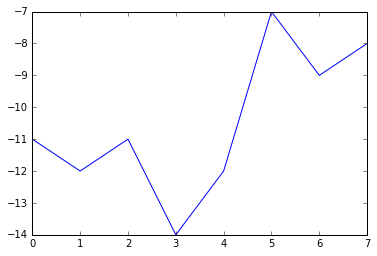

In [11]:
df['Temperature'].plot()

In [12]:
# another way to create a dataframe
df = DataFrame({'int_col' : [1,2,6,8,-1], 'float_col' : [0.1, 0.2,0.2,10.1,None], 'str_col' : ['a','b',None,'c','a']})
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [13]:
# index through the ix mothod
df.ix[:,['float_col','int_col']]

,float_col,int_col
0,0.1,1
1,0.2,2
2,0.2,6
3,10.1,8
4,NaN,-1


In [21]:
# index through the columns
df[['float_col','int_col']]

,float_col,int_col
0,0.1,1
1,0.2,2
2,0.2,6
3,10.1,8
4,NaN,-1


In [22]:
# idex based on a condition
df[df['float_col'] > 0.15]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


In [14]:
# idex based on a condition
df[df['float_col'] == 0.1]

,float_col,int_col,str_col
0,0.1,1,a


In [15]:
# another conditional indexing
df[(df['float_col'] > 0.1) & (df['int_col']>2)]

,float_col,int_col,str_col
2,0.2,6,None
3,10.1,8,c


In [16]:
# another conditional indexing
df[(df['float_col'] > 0.1) | (df['int_col']>2)]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


In [21]:
# another conditional indexing
df[~(df['float_col'] > 0.1)]

,float_col,int_col,str_col
0,0.1,1,a
4,NaN,-1,a


In [18]:
# change the name of a column and save the dataframe to a another
df2 = df.rename(columns={'int_col' : 'some_other_name'})
df2

,float_col,some_other_name,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [22]:
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [23]:
# rename it back and replace the existing dataframe
df2.rename(columns={'some_other_name' : 'int_col'}, inplace = True)
df2

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [24]:
# drop the missing values
df2.dropna()

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
3,10.1,8,c


In [25]:
# deep copy
df3 = df.copy()
df3

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [28]:
# compute the mean of the floats
mean = df3['float_col'].mean()
mean

2.65

In [31]:
# then replace the missing values by the mean
X=df3['float_col'].fillna(mean)

In [32]:
X

0     0.10
1     0.20
2     0.20
3    10.10
4     2.65
Name: float_col, dtype: float64

In [33]:
# using map to change the values for a column
df['str_col'].dropna().map(lambda x : 'map_' + x)

0    map_a
1    map_b
3    map_c
4    map_a
Name: str_col, dtype: object

In [34]:
# use the apply method to operate on the columns
df.ix[:,['int_col','float_col']].apply(np.sqrt)

,int_col,float_col
0,1.000000,0.316228
1,1.414214,0.447214
2,2.449490,0.447214
3,2.828427,3.178050
4,NaN,NaN


In [35]:
# use applymap to define a function to operae on the whole dataframe
def some_fn(x):
    if type(x) is str:
        return 'applymap_' + x
    elif x:
        return 100 * x
    else:
        return

    
df.applymap(some_fn)    


,float_col,int_col,str_col
0,10.0,100,applymap_a
1,20.0,200,applymap_b
2,20.0,600,None
3,1010.0,800,applymap_c
4,NaN,-100,applymap_a


In [44]:
# define a new DF
df = pd.DataFrame(data={"A":[1,2], "B":[1.2,1.3]})
df

,A,B
0,1,1.2
1,2,1.3


In [45]:
df['A']

0    1
1    2
Name: A, dtype: int64

In [46]:
# perform a mathematical operation
df['C'] = df["A"]+df["B"]
df

,A,B,C
0,1,1.2,2.2
1,2,1.3,3.3


In [47]:
# perform another one
df["D"] = df["A"]*3
df

,A,B,C,D
0,1,1.2,2.2,3
1,2,1.3,3.3,6


In [39]:
# and another
df["E"] = np.sqrt(df["A"])
df

,A,B,C,D,E
0,1,1.2,2.2,3,1.000000
1,2,1.3,3.3,6,1.414214


In [48]:
df = pd.DataFrame(data={"A":[1,2], "B":[1.2,1.3], "Z":["a","b"]})
df

,A,B,Z
0,1,1.2,a
1,2,1.3,b


In [41]:
# perform a vectorized operation on strings
df["F"] = df.Z.str.upper()
df

,A,B,Z,F
0,1,1.2,a,A
1,2,1.3,b,B


In [42]:
# deep copy
df = DataFrame({'int_col' : [1,2,6,8,-1], 'float_col' : [0.1, 0.2,0.2,10.1,None], 'str_col' : ['a','b',None,'c','a']})
df4 = df.copy()
def two_three_strings(x):
    return x*2, x*3
df4['twice'],df4['thrice'] = zip(*df4['int_col'].map(two_three_strings))
df4

,float_col,int_col,str_col,twice,thrice
0,0.1,1,a,2,3
1,0.2,2,b,4,6
2,0.2,6,None,12,18
3,10.1,8,c,16,24
4,NaN,-1,a,-2,-3


In [43]:
# Deep copy
df5 = df.copy()
def sum_two_cols(series):
    return series['int_col'] + series['float_col']
df5['sum_col'] = df5.apply(sum_two_cols,axis=1)
df5

,float_col,int_col,str_col,sum_col
0,0.1,1,a,1.1
1,0.2,2,b,2.2
2,0.2,6,None,6.2
3,10.1,8,c,18.1
4,NaN,-1,a,NaN


In [44]:
def int_float_squares(series):
    return pd.Series({'int_sq' : series['int_col']**2, 'flt_sq' : series['float_col']**2})
df.apply(int_float_squares, axis = 1)

,flt_sq,int_sq
0,0.01,1.0
1,0.04,4.0
2,0.04,36.0
3,102.01,64.0
4,NaN,1.0


In [45]:
df.describe() #provides quick stats on all suitable columns.

/Users/jimmy/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,float_col,int_col
count,4.00000,5.000000
mean,2.65000,3.200000
std,4.96689,3.701351
min,0.10000,-1.000000
25%,NaN,1.000000
50%,NaN,2.000000
75%,NaN,6.000000
max,10.10000,8.000000


In [46]:
# compute the covariance
df.cov()

,float_col,int_col
float_col,24.670000,12.483333
int_col,12.483333,13.700000


In [47]:
# compute the correlation
df.corr()

,float_col,int_col
float_col,1.000000,0.760678
int_col,0.760678,1.000000


In [48]:
# define another DF
other = DataFrame({'str_col' : ['a','b'], 'some_val' : [3, 2]})
other

,some_val,str_col
0,3,a
1,2,b


In [49]:
# merge the two using the intersection of keys from both frames (SQL: inner join)
pd.merge(df,other,on='str_col',how='inner')

,float_col,int_col,str_col,some_val
0,0.1,1,a,3
1,NaN,-1,a,3
2,0.2,2,b,2


In [50]:
# merge the two using the union of keys from both frames (SQL: inner join)
pd.merge(df,other,on='str_col',how='outer')

,float_col,int_col,str_col,some_val
0,0.1,1,a,3.0
1,NaN,-1,a,3.0
2,0.2,2,b,2.0
3,0.2,6,None,NaN
4,10.1,8,c,NaN


In [51]:
plot_df = DataFrame(np.random.randn(1000,2),columns=['x','y'])

In [52]:
plot_df['y'] = plot_df['y'].map(lambda x : x + 1)

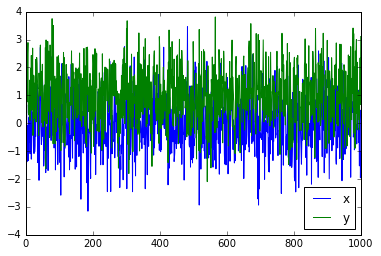

In [53]:
plot_df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aa421d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ac31510>]], dtype=object)

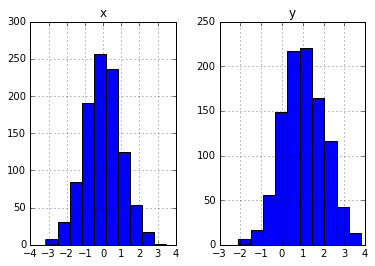

In [54]:
plot_df.hist()

In [55]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', None, 'CABA', 'dog', 'cat'])

In [56]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5    None
6    CABA
7     dog
8     cat
dtype: object

In [57]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    None
6    caba
7     dog
8     cat
dtype: object

In [58]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5    None
6    CABA
7     DOG
8     CAT
dtype: object

In [59]:
s.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64